### Name : Narasimha Gundavarapu
### USC ID: 4784512020

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Time Series Classification
### a) Download the AReM data from: https://archive.ics.uci.edu/ml/datasets/Activity+Recognition+system+based+on+Multisensor+data+fusion+%28AReM%29 . The dataset contains 7 folders that represent seven types of activities. In each folder, there are multiple files each of which represents an instant of a human performing an activity. Each file contains 6 times series collected from activities of the same person, which are called avg rss12, var rss12, avg rss13, var rss13, vg rss23, and ar rss23. There are 88 instances in the dataset, each of which contains 6 time series and each time series has 480 consecutive values.

The following block of code needed to be run only once. I converted it to raw, as this code removes the first 5 lines of each dataset and saves them in a dictionary fileInfo. [2]

### b) Keep datasets 1 and 2 in folders bending1 and bending 2, as well as datasets 1, 2, and 3 in other folders as test data and other datasets as train data.

In [122]:
import glob
from pathlib import Path

# test_files_1 = glob.glob('../data/bending[1-2]/*[1-2].csv')
# test_files_2 = glob.glob('../data/[c-w]*/dataset[123].csv')
# train_files_1 = glob.glob('../data/bending[1-2]/*[3-7].csv')
# train_files_2 = [item for item in glob.glob('../data/[c-w]*/*[0-9].csv') if item not in glob.glob('../data/[c-w]*/dataset[123].csv')] 

# test_data = pd.concat([pd.read_csv(f, index_col=[0], names=['time','avg_rss12','var_rss12','avg_rss13','var_rss13','avg_rss23','var_rss23']) for f in test_files_1 + test_files_2], ignore_index=True)
# train_data = pd.concat([pd.read_csv(f, index_col=[0], names=['time','avg_rss12','var_rss12','avg_rss13','var_rss13','avg_rss23','var_rss23']) for f in train_files_1 + train_files_2], ignore_index=True)
# print(test_data, train_data)

list_of_instances = []
folder_labels = []
files = Path('../data/').rglob('*.csv')
cols = ['time','avg_rss12','var_rss12','avg_rss13','var_rss13','avg_rss23','var_rss23']
for file in enumerate(files):
    if (str(file) == '../data/bending2/dataset4.csv'):
        df = pd.read_csv(file, names=cols, sep='\s+', index_col=[0])
    else:
        df = pd.read_csv(file, index_col=[0], names=cols)
    list_of_instances.append(df)

test_list = [list_of_instances[0], list_of_instances[1], list_of_instances[7], list_of_instances[8],
                     list_of_instances[13], list_of_instances[14], list_of_instances[15], 
                     list_of_instances[28], list_of_instances[29], list_of_instances[30], 
                     list_of_instances[43], list_of_instances[44], list_of_instances[45], 
                     list_of_instances[58], list_of_instances[59], list_of_instances[60], 
                     list_of_instances[73], list_of_instances[74], list_of_instances[75]]

train_list = [list_of_instances[2], list_of_instances[3], list_of_instances[4], list_of_instances[5],
                     list_of_instances[6], list_of_instances[9], list_of_instances[10], 
                     list_of_instances[11], list_of_instances[12], list_of_instances[16], 
                     list_of_instances[17], list_of_instances[18], list_of_instances[19], 
                     list_of_instances[20], list_of_instances[21], list_of_instances[22], 
                     list_of_instances[23], list_of_instances[24], list_of_instances[25],
                     list_of_instances[26], list_of_instances[27], list_of_instances[31],
                     list_of_instances[32], list_of_instances[33], list_of_instances[34],
                     list_of_instances[35], list_of_instances[36], list_of_instances[37],
                     list_of_instances[38], list_of_instances[39], list_of_instances[40],
                     list_of_instances[41], list_of_instances[42], list_of_instances[46],
                     list_of_instances[47], list_of_instances[48], list_of_instances[49],
                     list_of_instances[50], list_of_instances[51], list_of_instances[52],
                     list_of_instances[53], list_of_instances[54], list_of_instances[55],
                     list_of_instances[56], list_of_instances[57], list_of_instances[61],
                     list_of_instances[62], list_of_instances[63], list_of_instances[64],
                     list_of_instances[65], list_of_instances[66], list_of_instances[67],
                     list_of_instances[68], list_of_instances[69], list_of_instances[70],
                     list_of_instances[71], list_of_instances[72], list_of_instances[76],
                     list_of_instances[77], list_of_instances[78], list_of_instances[79],
                     list_of_instances[80], list_of_instances[81], list_of_instances[82],
                     list_of_instances[83], list_of_instances[84], list_of_instances[85],
                     list_of_instances[86], list_of_instances[87]
             ]


len(train_list)

69

### c) Feature Extraction
### Classification of time series usually needs extracting features from them. In this problem, we focus on time-domain features.
#### i) Research what types of time-domain features are usually used in time series classification and list them (examples are minimum, maximum, mean, etc).

The following are the types of time-domain features usually used in time series classification.
- Mean of each time series
- Standard Deviations
- Skewness (distortion or asymmetry in a symmetrical bell curve), Kurtosis (a measure of the "tailedness" of the probability distribution of a real-valued random variable) and higher order moments.
- 1st quartile, median, 3rd quartile of each time series
- Maximum and minimum values of each time series

#### ii) Extract the time-domain features minimum, maximum, mean, median, standard deviation, first quartile, and third quartile for all of the 6 time series in each instance. You are free to normalize/standardize features or use them directly.

In [164]:
def build_features(list_of_instances):
    
    instance = [i for i in range(1,len(list_of_instances)+1)]
    cols = list_of_instances[0].columns
    n = len(cols)
    min_list, max_list, mean_list, sd_list, fq_list, tq_list = ([[] for i in range(n)] for u in range(6))
    
    for l in list_of_instances:
        for i,col in enumerate(cols):
            min_list[i].append(l.min()[col])
            max_list[i].append(l.max()[col])
            mean_list[i].append(l.mean()[col])
            sd_list[i].append(l.std()[col])
            fq_list[i].append(l[col].quantile(0.25))
            tq_list[i].append(l[col].quantile(0.75))
                                 
    df_dict = {"Instance": instance}                            
    for i in range(n):
        df_dict['min' + str(i+1)] = min_list[i]
    for i in range(n):   
        df_dict['max' + str(i+1)] = max_list[i]
    for i in range(n):
        df_dict['mean' + str(i+1)] = mean_list[i]
    for i in range(n):
        df_dict['sd' + str(i+1)] = sd_list[i]
    for i in range(n):
        df_dict['fq' + str(i+1)] = fq_list[i]
    for i in range(n):
        df_dict['tq' + str(i+1)] = tq_list[i]
          
                                 
    new_df = pd.DataFrame(df_dict)
    new_df.set_index("Instance",  inplace=True)
    return new_df

build_features(list_of_instances)

,min1,min2,min3,min4,min5,min6,max1,max2,max3,max4,...,fq3,fq4,fq5,fq6,tq1,tq2,tq3,tq4,tq5,tq6
Instance,,,,,,,,,,,,,,,,,,,,,
1,37.25,0.0,4.00,0.0,27.25,0.00,45.00,1.30,29.50,7.23,...,16.00,0.0000,33.0000,0.0000,42.00,0.5000,23.2500,1.1200,36.00,1.3000
2,38.00,0.0,2.00,0.0,27.67,0.00,45.67,1.22,29.50,5.76,...,19.00,0.0000,32.0000,0.0000,43.67,0.5000,22.2500,1.1450,34.50,1.3000
3,33.00,0.0,8.50,0.0,20.00,0.00,47.75,3.00,30.00,5.15,...,20.50,0.4300,30.4575,0.0000,45.00,1.1200,24.3725,1.3000,36.33,1.0000
4,33.00,0.0,3.00,0.0,23.67,0.00,45.75,2.83,28.25,6.42,...,16.50,0.4300,28.4575,0.0000,42.75,0.7100,22.0625,1.1200,31.25,0.5000
5,35.00,0.0,6.50,0.0,29.00,0.00,47.40,1.70,29.75,4.44,...,19.75,0.0000,35.3625,0.0000,45.00,0.5000,24.0000,0.8300,36.50,0.9400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,21.50,0.0,6.50,0.0,7.00,0.00,51.25,13.55,24.00,9.50,...,13.25,2.0375,13.7500,2.1800,37.75,5.8900,17.2500,4.4025,18.00,4.5575
85,23.50,0.0,6.67,0.0,5.50,0.00,46.25,14.82,24.25,9.90,...,13.50,2.0575,13.7500,2.1700,38.25,5.9325,17.2500,4.1900,18.00,4.5000
86,19.75,0.0,6.25,0.0,6.25,0.00,45.50,13.47,22.25,9.00,...,13.50,2.1700,13.5000,2.1575,38.00,5.9700,17.0000,4.3900,17.75,4.5650


#### iii) Estimate the standard deviation of each of the time-domain features you extracted from the data. Then, use Python’s bootstrapped or any other method to build a 90% bootstrap confidence interval for the standard deviation of each feature.

In [165]:
from sklearn.utils import resample
from collections import defaultdict

new_df = build_features(list_of_instances)
iterations = 1000
size = len(new_df)
stds = defaultdict(list)

for col in new_df.columns:
    for i in range(iterations):
        samp = resample(new_df[col], n_samples=size)
        samp_std = samp.std()
        stds[col].append(samp_std)
     
alpha = 0.9

for col in new_df.columns:
    p = ((1.0-alpha)/2.0) * 100
    lower = np.percentile(stds[col], p)
    p = (alpha+((1.0-alpha)/2.0)) * 100
    upper = np.percentile(stds[col], p)
    print(col + " - " + "[" + str(lower) + ", " + str(upper) + "]")


min1 - [8.275047059036345, 10.77693472198026]
min2 - [0.0, 0.0]
min3 - [2.7535921228307774, 3.108395578430949]
min4 - [0.0, 0.0]
min5 - [4.411130768231913, 7.588717012154535]
min6 - [0.0, 0.07847613098768465]
max1 - [3.35206204294379, 5.26454406444699]
max2 - [4.608121625055849, 5.405569069191827]
max3 - [4.167137928613552, 5.460345523941189]
max4 - [1.984770483076197, 2.357567097169482]
max5 - [4.739017770384998, 6.594575709825691]
max6 - [2.240150675027183, 2.7692710801724654]
mean1 - [4.699092746762283, 5.906422942330206]
mean2 - [1.3962131283579358, 1.7047256109938826]
mean3 - [3.362622331634062, 4.529812765887842]
mean4 - [1.0728645297086368, 1.2212094181635054]
mean5 - [4.431209947871078, 6.7370886034501165]
mean6 - [1.0577350559336263, 1.2165005614937645]
sd1 - [1.562059577377513, 1.9507551872143476]
sd2 - [0.8077725259083894, 0.939871994622469]
sd3 - [0.7581418247359383, 1.122457509085717]
sd4 - [0.4207071186523238, 0.4861554027807618]
sd5 - [0.8103392229890846, 1.2191737546682

#### iv) Use your judgement to select the three most important time-domain features (one option may be min, mean, and max).

I'd like to go with min, mean and max.

### d) Binary Classification Using Logistic Regression
#### i) Assume that you want to use the training set to classify bending from other activities, i.e. you have a binary classification problem. Depict scatter plots of the features you specified in 1(c)iv extracted from time series 1, 2, and 6 of each instance, and use color to distinguish bending vs. other activities.

In [166]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

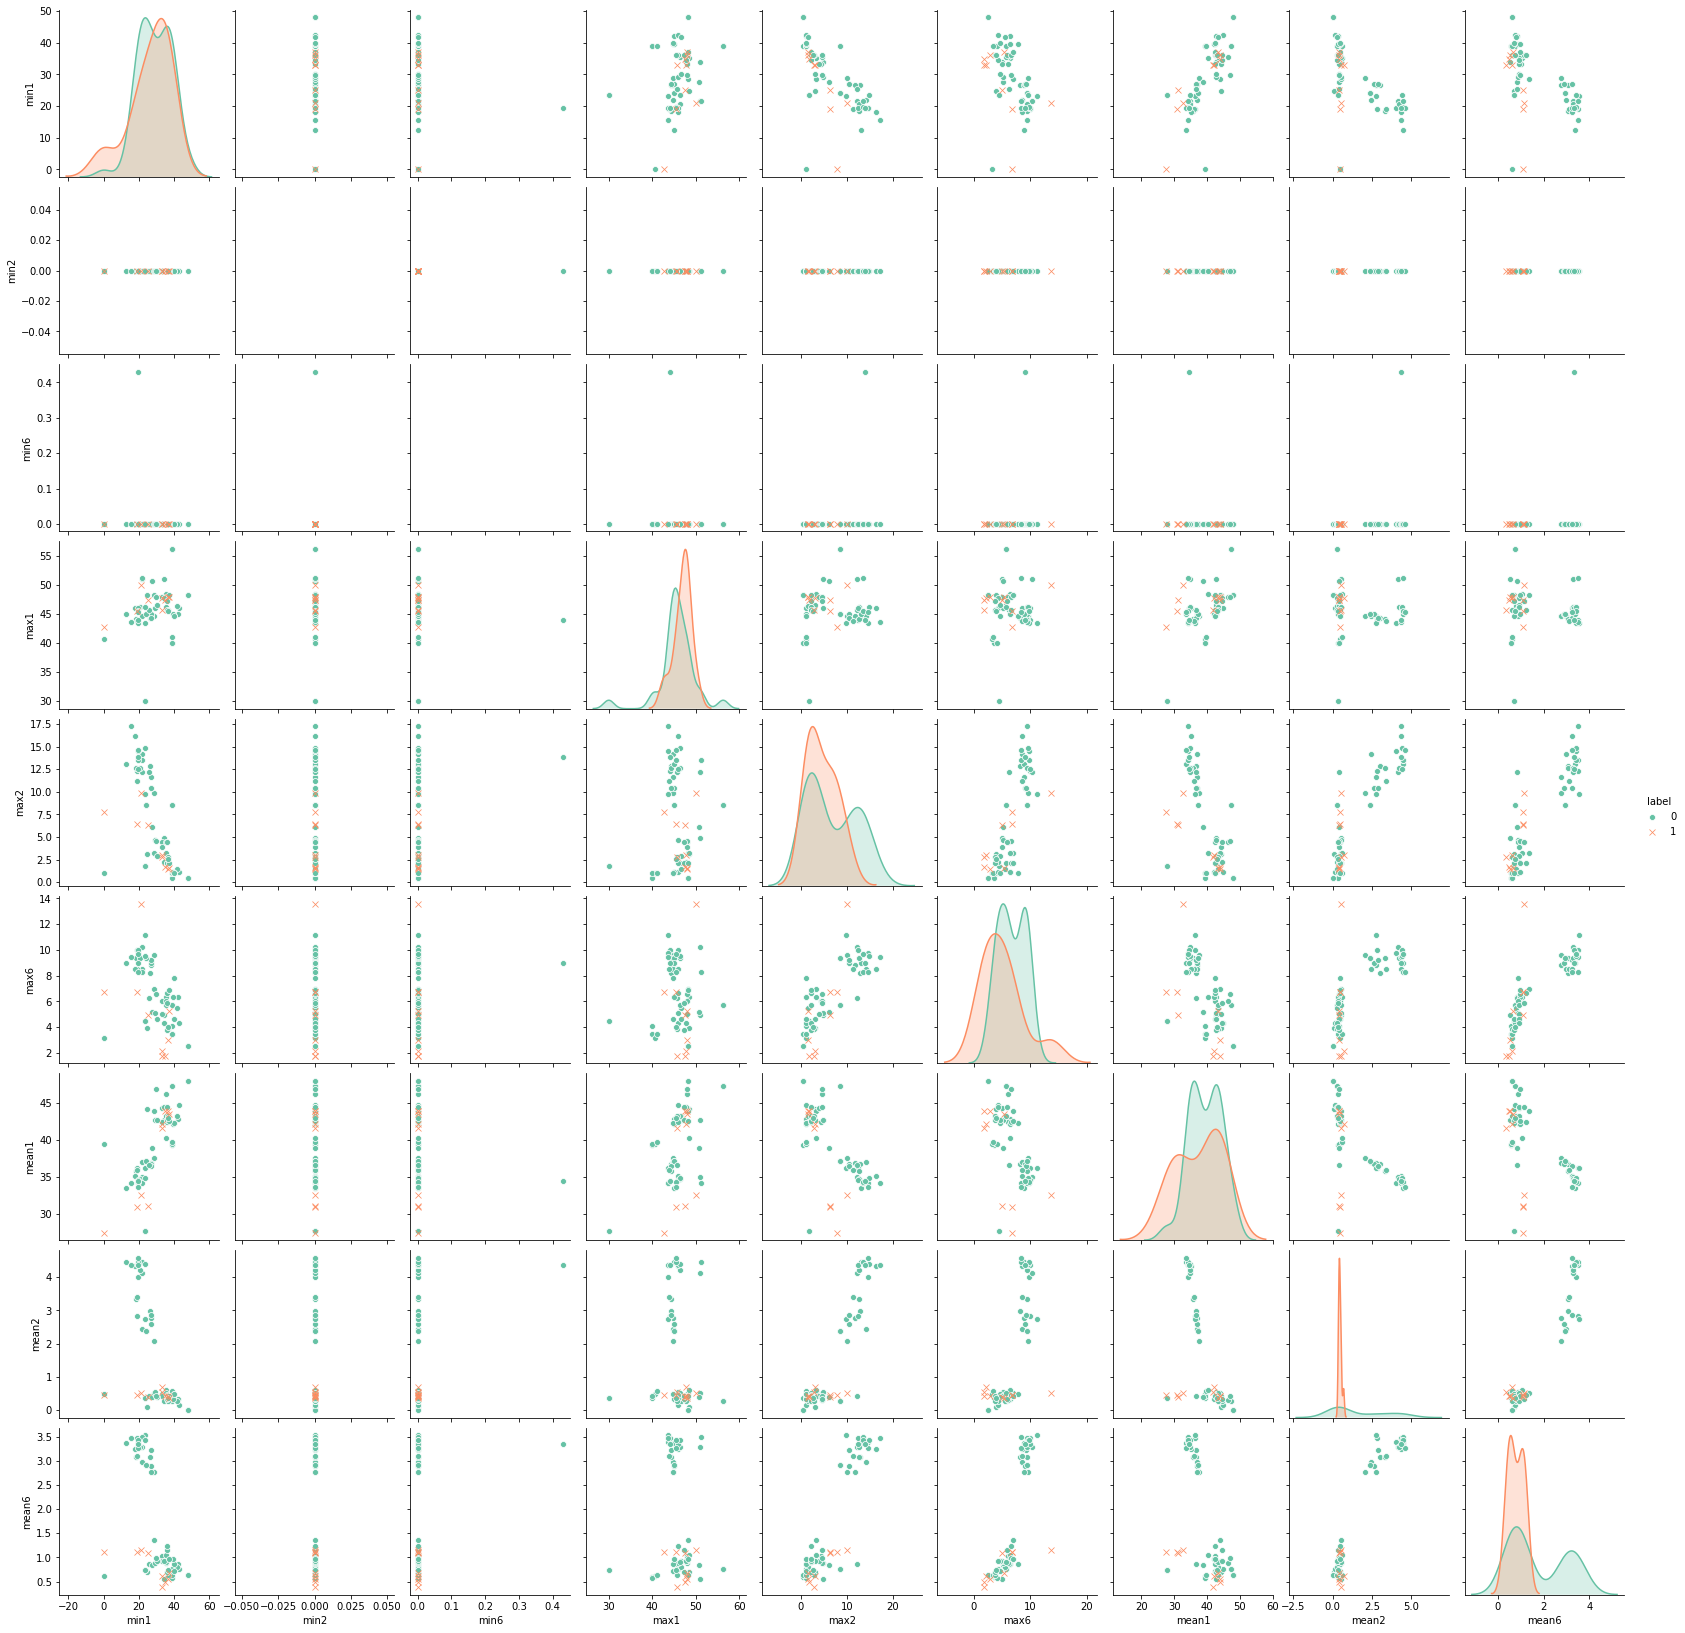

In [202]:
train_label = [1 if x<9 else 0 for x in range(69)] #as first 9 entries are for bending, 1 means being, 0 otherwise
new_df = build_features(train_list)
bin_df = new_df.filter(['min1', 'min2', 'min6', 'max1', 'max2', 'max6', 'mean1', 'mean2', 'mean6'], axis=1)
bin_df['label'] = train_label
sns.pairplot(bin_df, hue="label", markers=['o', 'x'], palette='Set2')

#### ii) Break each time series in your training set into two (approximately) equal length time series. Now instead of 6 time series for each of the training instances, you have 12 time series for each training instance. Repeat the experiment in 1(d)i, i.e depict scatter plots of the features extracted from both parts of the time series 1,2, and 12. Do you see any considerable difference in the results with those of 1(d)i

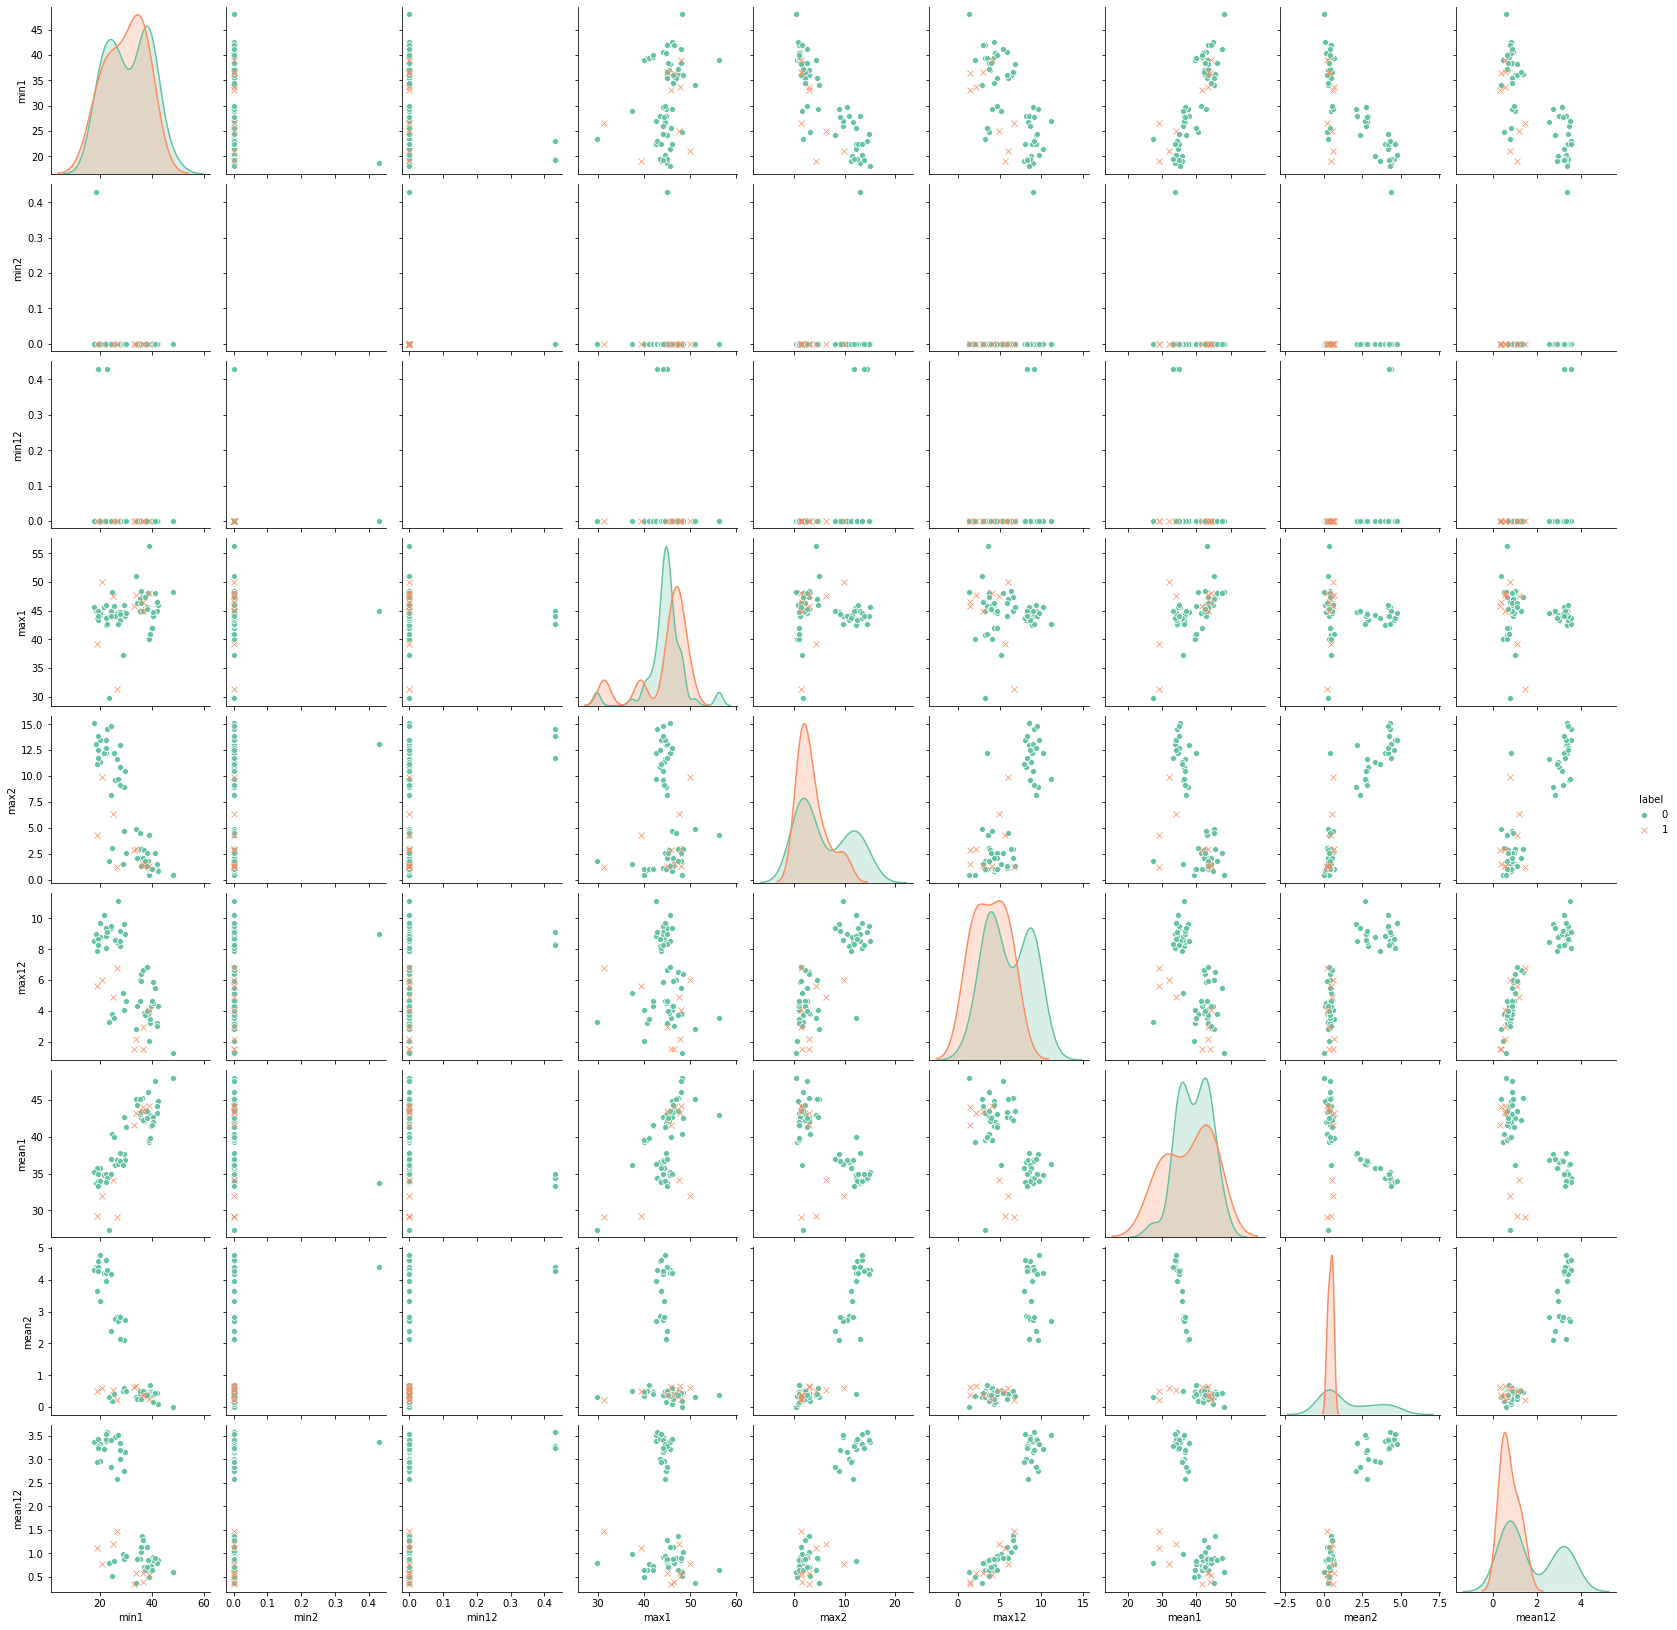

In [203]:
rename_dict = {'avg_rss12': 'avg_rss12_a', 'var_rss12': 'var_rss12_a', 'avg_rss13': 'avg_rss13_a', 'var_rss13': 'var_rss13_a',
                  'avg_rss23': 'avg_rss23_a', 'var_rss23': 'var_rss23_a'}
halved_train_data = []
for df in train_list:
    df1, df2 = df[:240], df[240:].rename(columns=rename_dict)
    df1.reset_index(drop=True, inplace=True)
    df2.reset_index(drop=True, inplace=True)
    temp_df = pd.concat([df1, df2], axis=1, sort=False)
    halved_train_data.append(temp_df)
    
bin_df = build_features(halved_train_data).filter(['min1', 'min2', 'min12', 'max1', 'max2', 'max12', 'mean1', 'mean2', 'mean12'], axis=1)
bin_df['label'] = train_label
sns.pairplot(bin_df, hue='label', markers=['o', 'x'], palette='Set2')

Except for a little scale change in min2, min12, I do not observe any other difference between these two scatterplots.

#### iii) Break each time series in your training set into l ∈ {1, 2, . . . , 20} time series of approximately equal length and use logistic regression to solve the binary classification problem, using time-domain features. Remember that breaking each of the time series does not change the number of instances. It only changes the number of features for each instance. Calculate the p-values for your logistic regression parameters in each model corresponding to each value of l and refit a logistic regression model using your pruned set of features. Alternatively, you can use backward selection using sklearn.feature selection or glm in R. Use 5-fold cross-validation to determine the best value of the pair(l, p), where p is the number of features used in recursive feature elimination. Explain what the right way and the wrong way are to perform cross-validation in this problem. Obviously use the right way! Also, you may encounter the problem of class imbalance, which may make some of your folds not having any instances of the rare class. In such a case, you can use stratified cross validation. Research what it means and use it if needed. In the following, you can see an example of applying Python’s Recursive Feature Elimination, which is a backward selection algorithm, to logistic re- gression.

In [219]:
import math
def split_data(dataframe, l):
    rem = len(dataframe) % l 
    div = len(dataframe) / l
    list_of_dataframes = []
    
    for i in range(l):
        list_of_dataframes.append(dataframe[i*math.floor(div):(i+1)*math.floor(div)])
        
    for j in range(0,len(list_of_dataframes)):
        rename_dict = {'avg_rss12': 'avg_rss12_' + str(j+1), 'var_rss12': 'var_rss12_' + str(j+1), 
                       'avg_rss13': 'avg_rss13_' + str(j+1), 'var_rss13': 'var_rss13_' + str(j+1), 
                       'avg_rss23': 'avg_rss23_' + str(j+1), 'var_rss23': 'var_rss23_' + str(j+1)}
        
        list_of_dataframes[j] = list_of_dataframes[j].rename(columns=rename_dict)
    
    for df in list_of_dataframes:
        df.reset_index(drop=True, inplace=True)
    

    return pd.concat(list_of_dataframes, axis=1)

print(split_data(train_list[1], 7))
        

    avg_rss12_1  var_rss12_1  avg_rss13_1  var_rss13_1  avg_rss23_1  \
0         44.33         0.47        23.75         0.43        30.00   
1         44.50         0.50        24.00         0.00        30.25   
2         44.00         0.71        24.00         0.00        30.50   
3         43.00         0.71        21.75         1.30        31.50   
4         42.75         0.43        25.00         2.24        35.25   
..          ...          ...          ...          ...          ...   
63        39.75         0.83        15.33         1.70        27.00   
64        39.00         0.00        18.00         0.00        26.50   
65        40.00         0.71        14.50         1.66        27.25   
66        41.50         0.50        16.50         3.20        28.50   
67        42.33         0.47        24.00         0.00        30.00   

    var_rss23_1  avg_rss12_2  var_rss12_2  avg_rss13_2  var_rss13_2  ...  \
0          0.00        43.67         0.47        24.00         0.00  ..

In [224]:
def build_best_features(list_of_instances):
    
    instance = [i for i in range(1,len(list_of_instances)+1)]
    cols = list_of_instances[0].columns
    n = len(cols)
    min_list, max_list, mean_list = ([[] for i in range(n)] for u in range(3))
    
    for l in list_of_instances:
        for i,col in enumerate(cols):
            min_list[i].append(l.min()[col])
            max_list[i].append(l.max()[col])
            mean_list[i].append(l.mean()[col])
                                 
    df_dict = {"Instance": instance}                            
    for i in range(n):
        df_dict['min' + str(i+1)] = min_list[i]
    for i in range(n):   
        df_dict['max' + str(i+1)] = max_list[i]
    for i in range(n):
        df_dict['mean' + str(i+1)] = mean_list[i]

          
                                 
    new_df = pd.DataFrame(df_dict)
    new_df.set_index("Instance",  inplace=True)
    return new_df

In [229]:
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression


test_label = [1 if x<4 else 0 for x in range(len(test_list))]
feature_dict = defaultdict()
train_label = [1 if x<9 else 0 for x in range(len(train_list))]
score = defaultdict()
best_features = defaultdict()

for l in range(1,21):
    split_data_list = []
    feature_list = []
    for df in train_list:
        train_ = split_data(df, l)
        split_data_list.append(train_)
    
    train_data = build_best_features(split_data_list)
#     print(train_data)
    model = LogisticRegression()
    rfecv = RFECV(estimator=model, cv=StratifiedKFold(5), scoring='accuracy')
    rfecv.fit(train_data, train_label)
    score[l] = rfecv.grid_scores_[rfecv.n_features_ - 1]
    for i,col in enumerate(train_data.columns):
        if rfecv.support_[i] == True:
            feature_list.append(col)
    best_features[l] = feature_list



In [287]:
best_l = []
for k,v in score.items():
    if v == max(score.values()):
        best_l.append(k)
print("l value with best accuracy: ", best_l)
print("Best Accuracy: " + str(max(score.values())))
print("best features from RFECV: ", best_features[2]) #choosing 2 as best_l as only it gives more than one feature


l value with best accuracy:  [1, 2, 13, 14]
Best Accuracy: 0.9857142857142858
best features from RFECV:  ['min5', 'min7', 'min9', 'max2', 'max3', 'max5', 'max8', 'max11', 'max12', 'mean1', 'mean5', 'mean7', 'mean9', 'mean11']


#### iv) Report the confusion matrix and show the ROC and AUC for your classifier on train data. Report the parameters of your logistic regression βi’s as well as the p-values associated with them.

Optimization terminated successfully    (Exit mode 0)
            Current function value: 1.0334896260380573e-10
            Iterations: 41
            Function evaluations: 49
            Gradient evaluations: 41
min5      NaN
min7      NaN
min9      NaN
max2      NaN
max3      1.0
max5      NaN
max8      NaN
max11     NaN
max12     NaN
mean1     NaN
mean5     NaN
mean7     NaN
mean9     NaN
mean11    NaN
dtype: float64
AUC:1.0


/Users/narry/miniconda3/envs/ml/lib/python3.8/site-packages/statsmodels/discrete/discrete_model.py:1747: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Users/narry/miniconda3/envs/ml/lib/python3.8/site-packages/statsmodels/discrete/discrete_model.py:1800: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
/Users/narry/miniconda3/envs/ml/lib/python3.8/site-packages/statsmodels/base/model.py:1354: RuntimeWarning: invalid value encountered in sqrt
  bse_ = np.sqrt(np.diag(self.cov_params()))


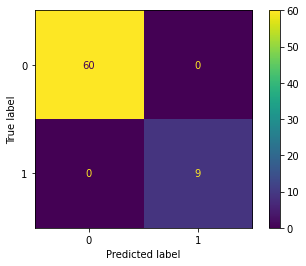

In [277]:
from sklearn.metrics import auc, roc_curve, plot_confusion_matrix
import statsmodels.api as sm

split_data_list = []
for df in train_list:
    train_ = split_data(df, 14)
    split_data_list.append(train_)

train_data = build_best_features(split_data_list).filter(best_features[2], axis=1)

model = LogisticRegression()
model.fit(train_data, train_label)
pred = model.predict(train_data)

X2 = sm.Logit(train_label, train_data).fit_regularized()

print(X2.pvalues)

fpr, tpr, thresholds = roc_curve(train_label, pred)

plot_confusion_matrix(model, train_data, train_label)
    
auc_ = auc(fpr, tpr)

print("AUC:" + str(auc_))

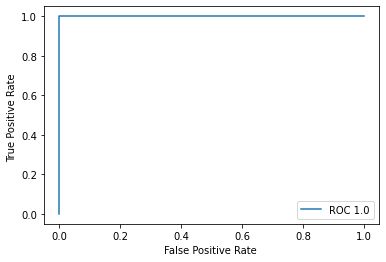

In [278]:
plt.plot(fpr, tpr, label="ROC " + str(auc_))
plt.xlabel("False Positive Rate ")
plt.ylabel("True Positive Rate ")
plt.legend()
plt.show()

#### v) Test the classifier on the test set. Remember to break the time series in your test set into the same number of time series into which you broke your training set. Remember that the classifier has to be tested using the features extracted from the test set. Compare the accuracy on the test set with the cross-validation accuracy you obtained previously.

In [285]:
split_data_list = []
for df in test_list:
    test_ = split_data(df, 14)
    split_data_list.append(test_)

test_data = build_best_features(split_data_list).filter(best_features[2], axis=1)

pred = model.predict(test_data)

print("Accuracy: ", model.score(test_data, test_label))


Accuracy:  0.8947368421052632


The accuracy on test set is less than the cross-validation accuracy.

#### vi) Do your classes seem to be well-separated to cause instability in calculating logistic regression parameters?

- From the observations above, I'd say yes.

#### vii) From the confusion matrices you obtained, do you see imbalanced classes? If yes, build a logistic regression model based on case-control sampling and adjust its parameters. Report the confusion matrix, ROC, and AUC of the model.

- From the confusion matrix above, I do not see any imbalance.

### (e) Binary Classification Using L1-penalized logistic regression
#### i) Repeat 1(d)iii using L1-penalized logistic regression,8 i.e. instead of using p-values for variable selection, use L1 regularization. Note that in this problem, you have to cross-validate for both l, the number of time series into which you break each of your instances, and λ, the weight of L1 penalty in your logistic regression objective function (or C, the budget). Packages usually perform cross validation for λ automatically.

In [289]:
from sklearn.linear_model import LogisticRegressionCV

score = defaultdict()

for l in range(1,21):
    split_data_list = []
    feature_list = []
    for df in train_list:
        train_ = split_data(df, l)
        split_data_list.append(train_)
    
    train_data = build_best_features(split_data_list)
    model = LogisticRegressionCV(penalty = 'l1', solver='liblinear', cv=5)
    model.fit(train_data, train_label)
    score[l] = model.score(train_data, train_label)
    



In [290]:
best_l = []
for k,v in score.items():
    if v == max(score.values()):
        best_l.append(k)
print("l value with best accuracy: ", best_l)
print("Best Accuracy: " + str(max(score.values())))

l value with best accuracy:  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
Best Accuracy: 1.0


#### ii) Compare the L1-penalized with variable selection using p-values. Which oneperforms better? Which one is easier to implement?

- L1 penalized is easier to implement than the variable selection with p-values. From the results above, L1-penalized performs better.

### f) Multi-class Classification (The Realistic Case)
#### i) Find the best l in the same way as you found it in 1(e)i to build an L1- penalized multinomial regression model to classify all activities in your training set Report your test error. Research how confusion matrices and ROC curves are defined for multiclass classification and show them for this problem if possible.

In [305]:

train_labels = []
for x in range(5):
    train_labels.append('bending1')
for x in range(4):
    train_labels.append('bending2')
for x in range(12):
    train_labels.append('cycling')
for x in range(12):
    train_labels.append('lying')
for x in range(12):
    train_labels.append('sitting')
for x in range(12):
    train_labels.append('standing')
for x in range(12):
    train_labels.append('walking')

test_labels = []
for x in range(2):
    test_labels.append('bending1')
for x in range(2):
    test_labels.append('bending2')
for x in range(3):
    test_labels.append('cycling')
for x in range(3):
    test_labels.append('lying')
for x in range(3):
    test_labels.append('sitting')
for x in range(3):
    test_labels.append('standing')
for x in range(3):
    test_labels.append('walking')

test_error = defaultdict()

# print(len(test_labels), len(train_labels), test_list)
for l in range(1,21):
    split_data_list_train = []
    split_data_list_test = []
    
    for df in train_list:
        train_ = split_data(df, l)
        split_data_list_train.append(train_)
        
    for df in test_list:
        test_ = split_data(df, l)
        split_data_list_test.append(test_)
        
    train_data = build_best_features(split_data_list_train)
    test_data = build_best_features(split_data_list_test)
#     print(test_data)
    model = LogisticRegressionCV(penalty = 'l1', cv=5, solver='liblinear')
    model.fit(train_data, train_labels)
    test_error[l] = 1 - model.score(test_data, test_labels)

In [309]:
from sklearn.metrics import multilabel_confusion_matrix
best_l = []

for k,v in test_error.items():
    if v == min(test_error.values()):
        best_l.append(k)
print("l value with best error rate: ", best_l)
print("Best Error rate: " + str(min(test_error.values())))

# for df in train_list:
#     train_ = split_data(df, 4)
#     split_data_list_train.append(train_)

# for df in test_list:
#     test_ = split_data(df, 4)
#     split_data_list_test.append(test_)

# train_data = build_best_features(split_data_list_train)
# test_data = build_best_features(split_data_list_test)

# model = LogisticRegressionCV(penalty = 'l1', cv=5, solver='liblinear')
# model.fit(train_data, train_labels)
# pred = model.predict(test_data)
# multilabel_confusion_matrix(model, test_labels, pred)

l value with best error rate:  [4, 6, 11]
Best Error rate: 0.1578947368421053


## ISLR 3.7.4. I collect a set of data (n = 100 observations) containing a single predictor and a quantitative response. I then fit a linear regression model to the data, as well as a separate cubic regression, i.e. Y = β0 +β1X +β2X2 +β3X3 +ε.
### (a) Suppose that the true relationship between X and Y is linear, i.e. Y = β0 + β1X + ε. Consider the training residual sum of squares (RSS) for the linear regression, and also the training RSS for the cubic regression. Would we expect one to be lower than the other, would we expect them to be the same, or is there not enough information to tell? Justify your answer.
- I think cubic regression gives lower RSS than linear regression, although the true relation is linear. The cubic regression overfits by covering every data point, thereby giving lower RSS than linear regression. 

### (b) Answer (a) using test rather than training RSS.
- For test RSS, I think linear regression will be lower than the cubic regression for the reason stated above. The test datapoints would probably not fall on the overfitted cubic curve.

### (c) Suppose that the true relationship between X and Y is not linear, but we don’t know how far it is from linear. Consider the training RSS for the linear regression, and also the training RSS for the cubic regression. Would we expect one to be lower than the other, would we expect them to be the same, or is there not enough information to tell? Justify your answer.
- As cubic regression has higher parameters, it will have a better fit to training data, implying lower RSS than that of linear regression.

### (d) Answer (c) using test rather than training RSS.
- As for test, unless the original curve is closer to cubic, cubic regression will have higher RSS.

## ISLR 4.7.3. This problem relates to the QDA model, in which the observations within each class are drawn from a normal distribution with a class- specific mean vector and a class specific covariance matrix. We con- sider the simple case where p = 1; i.e. there is only one feature. Suppose that we have K classes, and that if an observation belongs to the kth class then X comes from a one-dimensional normal dis- tribution, X ∼ N(μk,σk2). Recall that the density function for the one-dimensional normal distribution is given in (4.11). Prove that in this case, the Bayes’ classifier is not linear. Argue that it is in fact quadratic. Hint: For this problem, you should follow the arguments laid out in 22 Section 4.4.2, but without making the assumption that σ1 = . . . = σK .

It is not linear, it is quadratic in x. Please find the answer in PDF 'ISLR 4.7.3'.

## ISLR 4.7.7. Suppose that we wish to predict whether a given stock will issue a dividend this year (“Yes” or “No”) based on X, last year’s percent profit. We examine a large number of companies and discover that the mean value of X for companies that issued a dividend was X = 10, while the mean for those that didn’t was X = 0. In addition, the variance of X for these two sets of companies was σˆ2 = 36. Finally, 80 % of companies issued dividends. Assuming that X follows a nor- mal distribution, predict the probability that a company will issue a dividend this year given that its percentage profit was X = 4 last year. 


Please find the answer in PDF 'ISLR 4.7.7'

#### Sources:
1. https://jakevdp.github.io/PythonDataScienceHandbook/03.11-working-with-time-series.html
2. https://stackoverflow.com/questions/43451580/remove-first-4-lines-in-multiple-csv-files-python
3. Features for time series classification - https://stats.stackexchange.com/questions/50807/features-for-time-series-classification
4. https://machinelearningmastery.com/calculate-bootstrap-confidence-intervals-machine-learning-results-python/
5. https://stackoverflow.com/questions/15777951/how-to-suppress-pandas-future-warning
6. https://stackoverflow.com/questions/40339886/pandas-concat-generates-nan-values
7. https://www.geeksforgeeks.org/python-get-key-from-value-in-dictionary/
8.https://www.statsmodels.org/stable/generated/statsmodels.discrete.discrete_model.Logit.html#statsmodels.discrete.discrete_model.Logit